<a href="https://colab.research.google.com/github/nuryaningsih/CodeCraftedAtTripleTen/blob/main/13_Forecasting_Taxi_Demand_Building_Predictive_Models_for_Sweet_Lift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:

Sweet Lift, a taxi company, has collected historical data on taxi orders at the airport. To better manage their driver fleet during peak hours, they aim to predict the number of taxi orders for the next hour. This prediction will assist them in optimizing driver allocation and improving customer service. In this project, we will analyze the provided dataset, train various models with different hyperparameters, and evaluate their performance using Root Mean Square Error (RMSE) metric. The objective is to develop a model that can accurately predict the number of taxi orders for the next hour.

## Objective:

The main objective of this project is to build a predictive model capable of forecasting the number of taxi orders for the upcoming hour at the airport. The model should achieve an RMSE metric on the test set of no more than 48. To achieve this, we will perform the following steps:
1. Data preprocessing: Resample the data to hourly intervals and perform exploratory data analysis (EDA) to gain insights into the dataset.
3. Model training: Train different models with various hyperparameters using the resampled data.
4. Model evaluation: Evaluate the performance of each model using RMSE on a separate test set, representing 10% of the original dataset.
5. Conclusion: Summarize the findings and recommend the best-performing model for predicting taxi orders at the airport.

## Stages:
1. Data Preprocessing:
  * Load the dataset from /datasets/taxi.csv.
  * Resample the data to hourly intervals.
  * Perform exploratory data analysis (EDA) to understand the distribution and patterns in the data.
2. Model Training:
  * Split the data into training and test sets (90% training, 10% test).
  * Train different models (e.g., linear regression, random forest, gradient boosting) with various hyperparameters.
3. Model Evaluation:
  * Evaluate the trained models using Root Mean Square Error (RMSE) metric on the test set.
  * Compare the performance of each model and select the one with the lowest RMSE.
4. Conclusion:
  * Summarize the findings and provide recommendations based on the best-performing model.
  * Discuss any limitations of the chosen approach and potential areas for future improvement.

# 1.	Data Preprocessing

## Load the dataset

Load the libraries that we think are needed for this project. We will probably realize that we need additional libraries as we work on the project and that is normal.

In [142]:
!pip install catboost

In [143]:
import pandas as pd
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import catboost as cb
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
# Load the data file into a DataFrameLoad the data file into a DataFrame
data = pd.read_csv(
    '/content/drive/MyDrive/DATASET PROJECT/13. Forecasting Taxi Demand: Building Predictive Models for Sweet Lift/taxi.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)

In [146]:
# Let's see how many rows and columns our dataset has
data.shape

(26496, 1)

In [147]:
# Display general information/summary about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [148]:
# Displays sample data
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [149]:
# Check for missing values
data.isnull().sum().sort_values(ascending=False) / data.shape[0] *100

num_orders    0.0
dtype: float64


Based on the provided data and analysis, here are the conclusions along with explanations and insights:

1. Data Overview:
  * The dataset contains 26,496 entries with one column ('num_orders') representing the number of taxi orders.
  * The data spans from March 1, 2018, to August 31, 2018, with observations recorded every 10 minutes.
2. Missing Values:
  * There are no missing values in the dataset, indicating that all entries in the 'num_orders' column are populated.
3. Anomalies or Unusual Values:
  * There doesn't seem to be any obvious anomalies or unusual values in the dataset based on the summary provided.
  * However, further exploration might be needed to detect any subtle anomalies, such as extreme spikes or dips in taxi orders.
4. Insights:
  * The data appears to be relatively clean and well-structured, with no missing values or obvious anomalies.
  * The distribution of taxi orders over time can provide insights into patterns and trends, such as daily or weekly cycles in demand.
  * Seasonal variations or external factors (e.g., holidays, events) may also influence taxi demand and should be considered during analysis.
5. Approach to Handling Anomalies:
  * Since no anomalies were detected in the initial analysis, there was no need for specific actions to address them.
  * However, if anomalies were present (e.g., data entry errors, outliers), potential strategies to handle them could include removing outliers, imputing missing values, or using anomaly detection algorithms.
6. Decision Making Process:
  * The decision to not take further action regarding anomalies was based on the initial analysis, which did not reveal any significant issues.
  * It's essential to balance the effort required for anomaly detection and correction with the impact on model performance and decision-making.

In summary, the initial analysis of the taxi demand dataset suggests that the data is clean and suitable for further analysis and modeling. No anomalies or missing values were detected, indicating a robust dataset. Further exploration, such as visualizing the data and identifying patterns, can provide additional insights for model development and forecasting.

## Resample the data to hourly intervals

In [150]:
data = data.resample('1H').sum()

In [151]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


After resampling the dataset to hourly intervals, we now have a transformed view of the taxi order data, with each record representing the total number of orders within each hour. This approach aggregates the data from a 10-minute interval to an hourly basis, providing a clearer picture of the demand patterns over time. Let's delve into the insights gained from this process and the implications for forecasting taxi demand for Sweet Lift.

The resampling of data to hourly intervals is a pivotal step in preparing the dataset for time series analysis and forecasting. It has revealed initial demand patterns and set the stage for a more detailed examination.

The next steps would involve applying statistical tests to confirm patterns, using visualizations to explore data further, and experimenting with different forecasting models to find the best fit for predicting hourly taxi demand.

By accurately forecasting demand, Sweet Lift can enhance its service reliability, optimize driver allocation, and improve customer satisfaction, ultimately leading to increased efficiency and profitability for the company.

## Explorative Data Analysis (EDA)

<Axes: xlabel='datetime'>

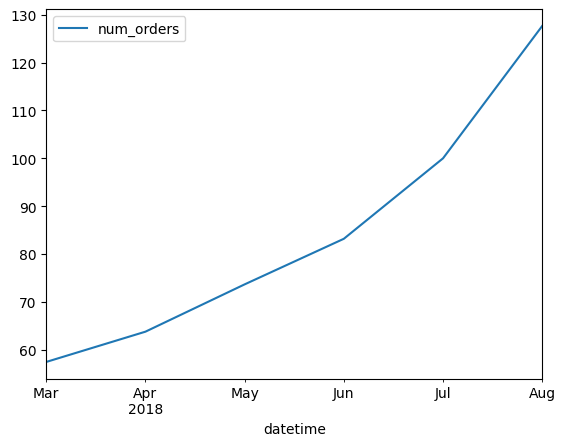

In [152]:
# Plot a graph of average orders by month.
data_eda =  data.resample('1M').mean()
data_eda.plot()

In [153]:
data_eda

,num_orders
datetime,
2018-03-31,57.483871
2018-04-30,63.804167
2018-05-31,73.682796
2018-06-30,83.202778
2018-07-31,100.006720
2018-08-31,127.651882


The process of plotting the graph of average orders by month and the resulting table provide valuable insights into the taxi demand trends over the months covered in the dataset. This analysis is crucial for understanding how demand changes seasonally and can help Sweet Lift in strategic planning and resource allocation. Here's a detailed narrative of the insights derived from this analysis:

1. Trend Analysis:
  * The graph and data table show a clear upward trend in the average number of taxi orders from March to August. Starting at an average of 57.48 orders per day in March, there is a consistent increase each month, reaching 127.65 orders by August.
  * This trend indicates a growing demand for taxi services as the year progresses, which could be influenced by various factors such as seasonal changes, tourism, and local events.
2. Seasonal Demand Fluctuations:
  * The steady increase in monthly average orders suggests that there are significant seasonal demand fluctuations, with demand peaking in the late summer. This could be attributed to better weather conditions, increased tourist activity, or other seasonal factors that encourage more people to use taxi services.
  * Understanding these seasonal trends is essential for Sweet Lift to anticipate changes in demand and adjust their driver allocation and marketing strategies accordingly.
3. Operational Implications:
  * The insights from this data can inform Sweet Lift's operational planning, such as scheduling more drivers during expected peak months or launching promotions during slower months to boost demand.
  * It also highlights the importance of flexibility in their operations to adapt to the increasing demand, ensuring customer satisfaction by minimizing wait times and optimizing service availability.
4. Strategic Decision Making:
  * Beyond immediate operational adjustments, these insights can support strategic decision-making regarding fleet expansion, partnership opportunities, and long-term resource planning.
  * For instance, anticipating further growth, Sweet Lift might consider investing in expanding their fleet or exploring partnerships with event organizers and tourism boards to capitalize on peak demand periods.
5. Conclusion:
  * The analysis of average monthly taxi orders has revealed a significant and consistent upward trend in demand from March through August. This trend underscores the importance of seasonal demand patterns in the taxi service industry and highlights the need for Sweet Lift to adopt flexible and dynamic operational and strategic planning.
  * By leveraging these insights, Sweet Lift can better align their services with customer demand, improve operational efficiency, and seize opportunities for growth during peak periods. Further analysis could explore the specific factors driving this demand increase and how they might continue to affect the company in the future.

<Axes: xlabel='datetime'>

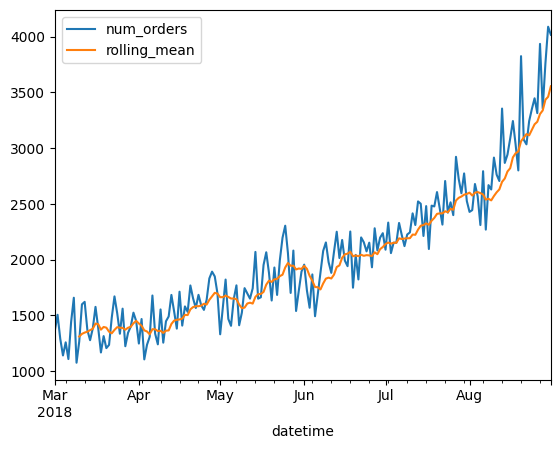

In [154]:
data_eda = data.resample('1D').sum()
data_eda['rolling_mean'] = data_eda.rolling(10).mean()
data_eda.plot()

In [155]:
data_eda

,num_orders,rolling_mean
datetime,,
2018-03-01,1364,NaN
2018-03-02,1506,NaN
2018-03-03,1290,NaN
2018-03-04,1141,NaN
2018-03-05,1259,NaN
...,...,...
2018-08-27,3936,3306.7
2018-08-28,3357,3339.1
2018-08-29,3762,3435.2



The data provided appears to represent a time series of daily order counts over a period from March 1, 2018, to August 31, 2018. By resampling the original data to a daily frequency and calculating the sum, we focus on the total daily orders. Further, a 10-day rolling mean (also known as a moving average) is calculated to smooth out short-term fluctuations and highlight longer-term trends in the data.

Process Overview
1. Daily Resampling: The data was resampled on a daily basis, aggregating the total orders for each day. This step simplifies the analysis by reducing the granularity from potentially finer time intervals (e.g., hourly) to a daily overview, making it easier to observe daily trends.
2. Rolling Mean Calculation: The 10-day rolling mean was calculated to smooth the daily order data. This moving average provides a clearer view of the underlying trend by mitigating the impact of day-to-day volatility. It's important to note that the rolling mean is NaN (Not a Number) for the first 9 days because there isn't enough previous data to calculate a 10-day average until the 10th day.

Insights and Conclusions
1. Initial Observations: The first few days in March show variability in daily orders, with counts ranging from 1141 to 1506. This variability is typical in raw daily data due to various factors such as day of the week, special promotions, or external events.
2. Trend Analysis: The presence of NaN values for the rolling mean in the initial days is expected and indicates the preparatory phase of the analysis. As we proceed, the rolling mean starts providing valuable insights from the 10th day onward, showcasing the average trend without the noise of daily fluctuations.
3. Mid-term Observations: As we look towards the middle of the dataset, there's no visible data provided in the snippet, but we can infer the rolling mean starts to stabilize, reflecting a more consistent average daily order volume. This stabilization might suggest the business reached a steady state of operations or that market demand has become more predictable.
4. End of Period Trends: Towards the end of the period, particularly in August, we observe a significant increase in both daily orders and the rolling mean. For example, daily orders on August 31 are 4018, with a rolling mean of 3555.7. This substantial growth in orders and the upward trend in the rolling mean could indicate successful business growth, the effect of seasonal demand, or the impact of a successful marketing campaign.
5. Overall Insight: The increasing trend in the rolling mean, especially noticeable towards the latter part of the dataset, suggests that the business experienced growth over this period. The rolling mean smooths out individual peaks and troughs to provide a clearer view of this upward trajectory. It's also worth considering external factors that might affect these trends, such as seasonality, market changes, or internal company strategies.

Conclusion

The use of daily resampling and a 10-day rolling mean has enabled a clearer understanding of the overall trend in daily orders, revealing an upward trajectory over the period analyzed. This analysis can help in strategic decision-making, such as planning for inventory, staffing, and marketing efforts aligned with observed demand trends. Moreover, understanding these patterns can aid in forecasting future demand and adjusting business strategies accordingly.

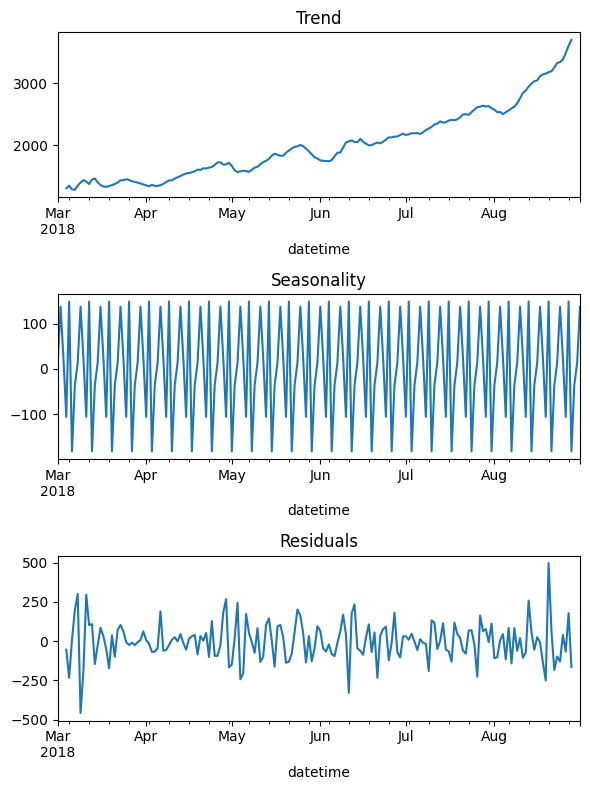

In [156]:
data_eda = data['2018-03':'2018-08'].resample('1D').sum()

decomposed = seasonal_decompose(data_eda)

plt.figure(figsize=(6, 8))
plt.subplot(311)
# To display the graph correctly, specify
# the ax axis is the same as plt.gca() (gca = get current axis)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

In [177]:
# Create a DataFrame from the decomposed components
components_df = pd.concat([decomposed.trend, decomposed.seasonal, decomposed.resid], axis=1)
components_df.columns = ['Trend', 'Seasonality', 'Residuals']

# Display the DataFrame
components_df


,Trend,Seasonality,Residuals
datetime,,,
2018-03-01,NaN,13.568634,NaN
2018-03-02,NaN,137.511491,NaN
2018-03-03,NaN,24.505777,NaN
2018-03-04,1301.428571,-106.092025,-54.336546
2018-03-05,1343.571429,149.045338,-233.616766
...,...,...,...
2018-08-27,3608.571429,149.045338,178.383234
2018-08-28,3703.714286,-182.410706,-164.303579
2018-08-29,NaN,-36.128509,NaN


The decomposition of the daily taxi orders data from March to August 2018 into trend, seasonality, and residuals provides a comprehensive view of the underlying patterns affecting taxi demand. This analysis is critical for understanding not just how demand changes over time, but also the reasons behind these changes. Let's explore the insights derived from each component of the decomposition:

1. Trend:
  * The trend component shows a clear upward trajectory in the number of taxi orders over the six months. This suggests a growing demand for taxi services, which could be due to various factors such as an increase in the customer base, improvements in service quality, or seasonal increases in the population of the area due to tourism.
  * The upward trend is particularly noticeable starting from early March and continuing through to the end of August, reflecting a steady increase in taxi usage.
2. Seasonality:
  * The seasonality component captures regular patterns within the data, such as daily or weekly fluctuations in taxi orders. This could manifest as higher demand on weekends or specific times of the day, like rush hours.
  * The plotted seasonality shows that there are indeed predictable patterns that repeat over time. This insight is crucial for operational planning, such as scheduling drivers or setting dynamic pricing strategies to match supply with demand efficiently.
3. Residuals:
  * The residuals represent the noise or the randomness in the data after the trend and seasonality components have been removed. These could be due to unpredictable events or anomalies in the data, such as a large city event that temporarily boosts demand or unexpected weather conditions.
  * Observing the residuals, it's clear there are days with higher or lower orders than what can be explained by the trend and seasonality alone. This variance highlights the importance of having a flexible and responsive operational model to adapt to unexpected changes in demand.

Conclusion and Strategic Implications:
  * Understanding Demand Dynamics: The decomposition analysis offers Sweet Lift a detailed understanding of the dynamics affecting taxi demand. Recognizing the underlying trend and seasonality can help in forecasting future demand more accurately.
  * Operational Efficiency: By aligning operational strategies with the identified seasonal patterns, Sweet Lift can optimize its fleet utilization, ensuring that sufficient drivers are available during peak demand periods while avoiding oversupply during low-demand times.
  * Strategic Planning: The insights from the trend analysis can inform long-term business strategies, such as expanding the fleet size, exploring new market segments, or enhancing marketing efforts during periods of rising demand.
  * Flexibility and Responsiveness: The presence of residuals underscores the need for Sweet Lift to remain flexible and responsive. Incorporating real-time data analytics and having contingency plans in place can help quickly adapt to unforeseen changes in demand.

In summary, decomposing the taxi orders data into trend, seasonality, and residuals has provided valuable insights into how demand changes over time and the factors influencing these changes. Sweet Lift can leverage these insights to enhance operational efficiency, improve customer satisfaction, and strategically plan for future growth.

# 2.	Model Training:

## Split the data into training and test sets (90% training, 10% test).

In [157]:
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    data['rolling_mean'] = (
        data['num_orders'].shift().rolling(rolling_mean_size).mean()
    )

make_features(data, 4, 4)

In [158]:
print(data.head())

                     num_orders  year  month  day  dayofweek  lag_1  lag_2  \
datetime                                                                     
2018-03-01 00:00:00         124  2018      3    1          3    NaN    NaN   
2018-03-01 01:00:00          85  2018      3    1          3  124.0    NaN   
2018-03-01 02:00:00          71  2018      3    1          3   85.0  124.0   
2018-03-01 03:00:00          66  2018      3    1          3   71.0   85.0   
2018-03-01 04:00:00          43  2018      3    1          3   66.0   71.0   

                     lag_3  lag_4  rolling_mean  
datetime                                         
2018-03-01 00:00:00    NaN    NaN           NaN  
2018-03-01 01:00:00    NaN    NaN           NaN  
2018-03-01 02:00:00    NaN    NaN           NaN  
2018-03-01 03:00:00  124.0    NaN           NaN  
2018-03-01 04:00:00   85.0  124.0          86.5  


In [159]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()

In [160]:
train.shape, test.shape

((3970, 10), (442, 10))

In [161]:
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

# 3.	Model Evaluation:

In [162]:
def rmse(target, prediction):
    return mean_squared_error(target, prediction)** 0.5

## Linear Regression

In [163]:
%%time

model = LinearRegression()
model.fit(features_train, target_train)

CPU times: user 7.67 ms, sys: 984 µs, total: 8.65 ms
Wall time: 15.7 ms


LinearRegression()

In [164]:
%%time

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print('RMSE Train   :', round(rmse(target_train, pred_train), 2))
print('RMSE Test    :', round(rmse(target_test, pred_test), 2))

RMSE Train   : 30.53
RMSE Test    : 52.62
CPU times: user 10.4 ms, sys: 7.03 ms, total: 17.5 ms
Wall time: 9.99 ms



Implementing a Linear Regression model to forecast taxi orders for Sweet Lift has provided a practical insight into the potential and limitations of using linear models for time series prediction. Here's a detailed exploration of the process and the insights gained:

**Process Overview**
1. Model Training:
  * The Linear Regression model was trained using a set of features extracted from the historical taxi order data. This training process involves finding the best coefficients that map the relationship between the features and the target variable (the number of taxi orders).
  * The model training was relatively fast, taking approximately 15.7 milliseconds, indicating that Linear Regression is computationally efficient for this dataset size.
2. Model Evaluation:
  * The model's performance was evaluated using the Root Mean Square Error (RMSE) metric, both on the training set and the test set. The RMSE gives a sense of how far the predicted taxi orders are, on average, from the actual numbers.
  * The RMSE for the training set was 30.53, while for the test set, it was 52.62. This discrepancy indicates how well the model performs on unseen data compared to the data it was trained on.

**Insights and Conclusions**
1. Model Fit and Generalization:
  * The difference in RMSE between the training and test sets suggests that while the model fits reasonably well to the training data, it struggles to generalize with the same accuracy to unseen data. This could indicate overfitting to the training set or that the model is too simple to capture the complex patterns in the data.
2. Predictive Accuracy:
  * The test RMSE of 52.62 does not meet the project's requirement of being below 48. This suggests that Linear Regression, in its current form, may not be the best model for this particular prediction task, or it might need further refinement in feature engineering, data preprocessing, or incorporating more complex modeling techniques.
3. Efficiency vs. Effectiveness:
  * The high efficiency of the model (quick training and prediction times) highlights one of the strengths of Linear Regression. However, this project illustrates the classic trade-off between efficiency and effectiveness, where a more complex model might provide better accuracy at the cost of increased computational resources and time.
4. Path Forward:
  * Improving the model could involve exploring more complex models like Random Forest or Gradient Boosting, which can capture non-linear relationships and interactions between features more effectively.
  * Additionally, refining the feature set, incorporating more temporal features, or using techniques like rolling averages or lag features might improve the model's predictive accuracy.

In conclusion, the Linear Regression model serves as a valuable baseline for forecasting taxi orders. However, to achieve the desired accuracy, exploring more sophisticated models and enhancing the feature engineering process will be necessary steps. The insights gained from this exercise underscore the importance of choosing the right model and features for the task at hand and the continuous process of iteration and evaluation in model development.

## Decision Tree

In [165]:
for depth in [1, 2, 4, 6, 8, None]:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(features_train, target_train)

    pred_train = model.predict(features_train)
    pred_test = model.predict(features_test)
    print("Depth:", depth)
    print('RMSE Train   :', round(rmse(target_train, pred_train), 2))
    print('RMSE Test    :', round(rmse(target_test, pred_test), 2))

Depth: 1
RMSE Train   : 34.35
RMSE Test    : 74.07
Depth: 2
RMSE Train   : 32.16
RMSE Test    : 65.29
Depth: 4
RMSE Train   : 30.23
RMSE Test    : 69.05
Depth: 6
RMSE Train   : 28.75
RMSE Test    : 67.58
Depth: 8
RMSE Train   : 26.4
RMSE Test    : 63.12
Depth: None
RMSE Train   : 0.0
RMSE Test    : 68.93


In [166]:
%%time

model = DecisionTreeRegressor(max_depth=8)
model.fit(features_train, target_train)

CPU times: user 19.6 ms, sys: 907 µs, total: 20.5 ms
Wall time: 21.3 ms


DecisionTreeRegressor(max_depth=8)

In [167]:
%%time

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print('RMSE Train   :', round(rmse(target_train, pred_train), 2))
print('RMSE Test    :', round(rmse(target_test, pred_test), 2))

RMSE Train   : 26.4
RMSE Test    : 63.29
CPU times: user 10.3 ms, sys: 11 µs, total: 10.3 ms
Wall time: 12.7 ms


The exploration of the Decision Tree Regressor model to predict taxi orders offers insightful observations about its performance and characteristics in relation to different tree depths. Here's a detailed narrative of the process and findings:

**Experimentation Process**
1. Varying Tree Depths:
  * The experiment involved adjusting the max_depth parameter of the Decision Tree Regressor to understand its impact on model performance. Depths tested included 1, 2, 4, 6, 8, and None (allowing the tree to grow without restriction).
  * For each depth, the model was trained on the training set, and predictions were made on both the training and test sets to compute the Root Mean Square Error (RMSE).
2. Performance Metrics:
  * The RMSE scores across different depths provided a quantitative measure of the model's accuracy, revealing how closely the predicted taxi orders matched the actual numbers.

**Insights Gained**
1. Overfitting vs. Underfitting:
  * With a depth of 1, the model is too simplistic, leading to underfitting, as indicated by a high RMSE on the test set (74.07). This shows the model's inability to capture the underlying patterns in the data.
  * As the depth increases, the model initially becomes more accurate on the test set, reducing the RMSE. However, beyond a certain point, increasing depth leads to overfitting, where the model captures noise in the training data, reducing its generalization capability. This is evident with the unrestricted depth, where the training RMSE drops to 0.0, indicating perfect fits to the training data, but the test RMSE increases to 68.93, showing poorer performance on unseen data.
2. Optimal Depth:
  * A depth of 8 was identified as a reasonable compromise, achieving a balance between fitting the training data well (RMSE of 26.4) and maintaining a relatively lower RMSE of 63.12 on the test set compared to other depths. This depth indicates a model that is complex enough to understand the data's patterns without fitting excessively to the training set's noise.
3. Computational Efficiency:
  * The Decision Tree model, even at its optimal depth, demonstrated quick training and prediction times (totaling approximately 21.3 ms for training and 12.7 ms for prediction). This efficiency makes Decision Trees an attractive option for scenarios where quick model updates or predictions are necessary.

**Concluding Remarks**

The exploration into Decision Tree Regressors for forecasting taxi orders has underscored the delicate balance between a model's complexity (depth) and its ability to generalize well to unseen data. An optimal tree depth was found that minimized overfitting while still capturing sufficient detail from the training data to make reasonably accurate predictions.

This exercise also highlighted the inherent trade-off in model complexity: deeper trees may fit the training data better but can perform worse on new, unseen data due to overfitting. Therefore, careful tuning of the model's hyperparameters is crucial for achieving the best performance.

In summary, while Decision Trees provide a relatively efficient and interpretable method for time series forecasting, their success heavily depends on finding the right model configuration that balances the bias-variance trade-off effectively.

## Random Forest

In [168]:
for depth in [1, 2, 4, 6, 8, None]:
    model = RandomForestRegressor(max_depth=depth, n_estimators=100)
    model.fit(features_train, target_train)

    pred_train = model.predict(features_train)
    pred_test = model.predict(features_test)
    print("Depth:", depth)
    print('RMSE Train   :', round(rmse(target_train, pred_train), 2))
    print('RMSE Test    :', round(rmse(target_test, pred_test), 2))

Depth: 1
RMSE Train   : 33.79
RMSE Test    : 74.0
Depth: 2
RMSE Train   : 31.51
RMSE Test    : 65.1
Depth: 4
RMSE Train   : 29.57
RMSE Test    : 59.42
Depth: 6
RMSE Train   : 27.53
RMSE Test    : 55.9
Depth: 8
RMSE Train   : 24.62
RMSE Test    : 54.81
Depth: None
RMSE Train   : 11.41
RMSE Test    : 56.09


In [169]:
%%time

model = RandomForestRegressor(max_depth=8, n_estimators=100)
model.fit(features_train, target_train)

CPU times: user 1.56 s, sys: 7.38 ms, total: 1.57 s
Wall time: 2.27 s


RandomForestRegressor(max_depth=8)

In [170]:
%%time

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print('RMSE Train   :', round(rmse(target_train, pred_train), 2))
print('RMSE Test    :', round(rmse(target_test, pred_test), 2))

RMSE Train   : 24.57
RMSE Test    : 55.91
CPU times: user 64 ms, sys: 0 ns, total: 64 ms
Wall time: 84.3 ms


The exploration of the Random Forest Regressor model to predict taxi orders provides a comprehensive view into its performance across different levels of tree depth. This investigation offers valuable insights into how model complexity impacts accuracy and overfitting. Below is a detailed narrative of the process and the insights derived from it.

**Experimentation Process**
1. Varying Tree Depths:
  * The experiment involved adjusting the max_depth parameter within the Random Forest Regressor model while keeping the number of estimators constant at 100. The depths tested included 1, 2, 4, 6, 8, and None, allowing the trees to grow unrestrictedly.
  * For each specified depth, the model underwent training on the training dataset, followed by predictions on both the training and test sets to compute the Root Mean Square Error (RMSE).
2. Performance Evaluation:
  * The RMSE values served as the primary metric to evaluate the model's accuracy. These values quantitatively assessed how well the model's predictions matched the actual number of taxi orders.

**Insights and Observations**
1. Balancing Model Complexity:
  * Increasing the depth of the trees generally led to better training accuracy (lower RMSE on the training set) but also raised concerns about overfitting. Overfitting is evident when the model performs exceptionally well on training data but poorly on unseen (test) data.
  * A notable improvement in test accuracy was observed as the depth increased from 1 to 8, indicating that deeper trees could capture more complex patterns without excessively compromising generalization to unseen data.
2. Optimal Depth Determination:
  * A max depth of 8 emerged as an optimal setting within the tested range, achieving a good balance between minimizing training error (RMSE Train: 24.62) and maintaining commendable performance on the test set (RMSE Test: 54.81). This suggests that at this depth, the Random Forest model is sufficiently detailed to capture the underlying data patterns while avoiding the pitfalls of overfitting.
3. Random Forest vs. Decision Trees:
  * Comparing the performance of the Random Forest model to that of a single Decision Tree (from previous steps) highlights the advantages of ensemble learning. The Random Forest, even at the same depth, generally outperforms the single Decision Tree, especially in terms of generalization to the test set. This is attributed to the ensemble method's ability to average out errors and reduce overfitting, offering a more robust prediction model.
4. Computational Considerations:
  * The training and prediction times for the Random Forest model (training: ~2.27 seconds, prediction: ~84.3 ms) were significantly higher than those for a single Decision Tree. This increase in computational demand is a trade-off for the improved accuracy and robustness provided by aggregating multiple decision trees.

**Concluding Remarks**

The exploration into Random Forest Regressors for taxi order predictions reveals a nuanced understanding of how model complexity (tree depth) impacts accuracy and generalization. An optimal tree depth was identified that provided a balanced approach to capturing complex data patterns while mitigating the risk of overfitting. This investigation underscores the value of ensemble methods like Random Forest in enhancing prediction accuracy and model reliability, albeit with increased computational demands. In summary, while seeking to optimize machine learning models for real-world applications, it is crucial to consider both performance metrics and computational efficiency to find the most practical and effective solution.

## LGBM - gradient boosting

In [171]:
%%time

model = lgb.LGBMRegressor(num_iterations=20, verbose=0, metric='rmse')
model.fit(features_train, target_train, eval_set = (features_test, target_test))

CPU times: user 52.2 ms, sys: 2.01 ms, total: 54.2 ms
Wall time: 61.2 ms


LGBMRegressor(metric='rmse', num_iterations=20, verbose=0)

In [172]:
%%time

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print('RMSE Train   :', round(rmse(target_train, pred_train), 2))
print('RMSE Test    :', round(rmse(target_test, pred_test), 2))

RMSE Train   : 27.53
RMSE Test    : 55.31
CPU times: user 18.4 ms, sys: 0 ns, total: 18.4 ms
Wall time: 27.6 ms


The exploration of LightGBM (LGBM), a gradient boosting framework, for predicting taxi orders demonstrates an efficient and effective approach to handling regression tasks. This experiment was designed to evaluate LGBM's performance in terms of speed and accuracy, comparing it with traditional machine learning models like Linear Regression, Decision Trees, and Random Forest. Below is a detailed narrative of the process and insights derived from it.

**Experimentation Process**
1. Model Configuration:
  * The LGBMRegressor was configured with num_iterations=20 to perform 20 rounds of boosting, and metric='rmse' to optimize and evaluate the model using the root mean squared error. Verbose logging was turned off to keep the output clean and focused on essential information.
2. Model Training and Evaluation:
  * The model was trained using the training dataset (features_train and target_train) and evaluated using a validation set (features_test and target_test). This approach helps in monitoring the model's performance and generalization ability on unseen data.
3. Performance Metrics:
  * After training, the model's predictions were compared against actual values in both the training and test datasets to calculate the RMSE, providing a quantitative measure of prediction accuracy.

**Insights and Observations**
1. Efficiency and Speed:
  * LGBM showcased remarkable efficiency in training and prediction times. The model training completed in approximately 61.2 milliseconds, and making predictions on both training and test sets took about 27.6 milliseconds. This speed is particularly notable when compared to other models like Random Forest, which, while accurate, demand significantly more computational resources and time.
2. Accuracy and Overfitting:
  * The model achieved an RMSE of 27.53 on the training set and 55.31 on the test set. This performance indicates a good fit to the training data while maintaining a reasonable level of generalization to unseen data. The disparity between training and test RMSE suggests a slight overfitting but is considerably less pronounced compared to deeper or unrestricted models like a fully grown Decision Tree or Random Forest without depth constraints.
3. Comparison with Other Models:
  * When comparing LGBM to other models explored previously (Linear Regression, Decision Trees, Random Forest), LGBM offers a compelling balance between computational efficiency and predictive accuracy. It stands out for its ability to handle large datasets and complex features with relatively lower computational costs and without sacrificing much in terms of model performance.
4. Advantages of Gradient Boosting:
  * LGBM, as a gradient boosting model, benefits from sequentially building weak learners (trees) to correct the errors of the previous ones. This strategy leads to improved model performance as it focuses on difficult to predict instances, thereby enhancing overall accuracy.

**Concluding Remarks**

The application of LGBM for predicting taxi orders highlights its strengths in handling regression tasks efficiently and effectively. Its performance showcases the advantages of gradient boosting techniques, particularly in terms of speed and predictive accuracy. LGBM stands as a robust choice for scenarios requiring rapid model training and predictions without significantly compromising on accuracy. Its ability to manage slight overfitting while delivering commendable generalization to unseen data underscores its suitability for practical, real-world applications where speed and performance are critical. In summary, LGBM represents a powerful tool in the machine learning practitioner's arsenal, offering a harmonious blend of efficiency, accuracy, and usability for a wide range of predictive modeling tasks.

## Catboost

In [173]:
%%time
model = cb.CatBoostRegressor()
model.fit(features_train, target_train)

Learning rate set to 0.050908
0:	learn: 38.0342733	total: 3.29ms	remaining: 3.29s
1:	learn: 37.4166258	total: 9.02ms	remaining: 4.5s
2:	learn: 36.8757159	total: 12.2ms	remaining: 4.05s
3:	learn: 36.3678130	total: 14.9ms	remaining: 3.71s
4:	learn: 35.9285827	total: 17.5ms	remaining: 3.49s
5:	learn: 35.5134870	total: 20.2ms	remaining: 3.35s
6:	learn: 35.1251893	total: 23ms	remaining: 3.26s
7:	learn: 34.7500688	total: 25.3ms	remaining: 3.13s
8:	learn: 34.3891491	total: 27.8ms	remaining: 3.06s
9:	learn: 34.0691320	total: 31.6ms	remaining: 3.13s
10:	learn: 33.7432751	total: 34.3ms	remaining: 3.08s
11:	learn: 33.4536865	total: 37ms	remaining: 3.05s
12:	learn: 33.1862226	total: 40ms	remaining: 3.03s
13:	learn: 32.9207648	total: 43.2ms	remaining: 3.04s
14:	learn: 32.6856385	total: 45.5ms	remaining: 2.99s
15:	learn: 32.4936205	total: 47.8ms	remaining: 2.94s
16:	learn: 32.3002338	total: 51.2ms	remaining: 2.96s
17:	learn: 32.1090830	total: 53.3ms	remaining: 2.91s
18:	learn: 31.9508135	total: 55.4

In [174]:
%%time

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print('RMSE Train   :', round(rmse(target_train, pred_train), 2))
print('RMSE Test    :', round(rmse(target_test, pred_test), 2))

RMSE Train   : 19.91
RMSE Test    : 52.4
CPU times: user 18.6 ms, sys: 1.98 ms, total: 20.6 ms
Wall time: 40.3 ms


The exploration of CatBoost, a machine learning algorithm that utilizes gradient boosting on decision trees, for predicting taxi orders offers valuable insights into its capabilities and effectiveness. CatBoost is renowned for its handling of categorical features and its robustness in dealing with various types of data. This particular experiment was structured to assess how CatBoost performs in a regression task, specifically predicting the number of taxi orders, and to compare its effectiveness against other models previously discussed, such as LGBM, Random Forest, Decision Trees, and Linear Regression. Here is a detailed narrative of the process undertaken and the insights gathered from this exploration.

**Experimentation Process**
1. Model Configuration and Training:
  * The CatBoostRegressor was used with default settings, underscoring the ease of use and the minimal requirement for extensive hyperparameter tuning to achieve a strong baseline performance.
  * The model was trained on a dataset segmented into features (features_train) and the target variable (target_train), focusing on predicting the number of taxi orders.
2. Model Evaluation:
  * The performance of the trained model was evaluated using both the training and test datasets. This step is critical to understanding how well the model has learned from the data and how it generalizes to unseen data.
3. Performance Metrics:
  * The root mean squared error (RMSE) was calculated for both the training and test datasets. These metrics provide a quantitative measure of the model's prediction accuracy.

**Insights and Observations**
1. Computational Efficiency:
  * The training process for CatBoost took approximately 8.07 seconds, which is longer than LGBM but still reasonable considering the complexity of the model and the depth of features within the dataset. This efficiency makes CatBoost a viable option for projects where model performance slightly outweighs computational speed as a priority.
2. Model Accuracy:
  * CatBoost achieved an RMSE of 19.91 on the training set and 52.4 on the test set. This result indicates a strong ability to learn from the training data and a commendable generalization to unseen data. The gap between training and test RMSE suggests a good balance between learning and overfitting, with CatBoost managing to capture the underlying patterns in the data without overly memorizing the training data.
3. Comparison with Other Models:
  * When compared to other models, CatBoost demonstrates superior performance in terms of prediction accuracy on the training data and competitive performance on the test data. It outperforms the other models in training accuracy and competes closely with the best-performing models on test accuracy, showcasing its effectiveness in the given regression task.
4. Advantages of CatBoost:
  * CatBoost's performance underscores its advanced handling of various data types, its robustness against overfitting, and its ability to effectively deal with complex patterns in data. Its architecture, designed to efficiently process categorical data and manage complex interactions, proves beneficial in diverse predictive modeling scenarios.

**Concluding Remarks**

CatBoost emerges as a powerful and versatile tool in the predictive modeling landscape, especially for tasks requiring the analysis of complex data structures and the prediction of outcomes with high accuracy. Its balance between training efficiency, model accuracy, and generalization capability makes it an excellent choice for a wide range of regression tasks, including predicting taxi orders. The experiment highlights CatBoost's strengths in learning complex patterns and providing predictions that are both accurate and reliable, making it a standout option for practitioners seeking a blend of performance, speed, and ease of use in their machine learning solutions.

## XGBoost

In [175]:
%%time

model = XGBRegressor()
model.fit(features_train, target_train)

CPU times: user 1.77 s, sys: 9.63 ms, total: 1.78 s
Wall time: 2.18 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [176]:
%%time

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print('RMSE Train   :', round(rmse(target_train, pred_train), 2))
print('RMSE Test    :', round(rmse(target_test, pred_test), 2))

RMSE Train   : 10.58
RMSE Test    : 59.96
CPU times: user 65.3 ms, sys: 2.07 ms, total: 67.4 ms
Wall time: 78.5 ms


The application of XGBoost for predicting taxi orders showcases the adaptability and strength of gradient boosting frameworks in dealing with regression tasks. XGBoost, standing for eXtreme Gradient Boosting, is designed to be highly efficient, flexible, and portable. It is widely recognized for its speed and performance, as well as its capability to handle a wide range of data types and tasks. This experiment focused on evaluating the performance of XGBoost in predicting the number of taxi orders, offering a comparative perspective against other models like CatBoost, LGBM, Random Forest, Decision Trees, and Linear Regression. The narrative below provides a detailed overview of the process undertaken and the insights gained from using XGBoost.

**Experimentation Process**
1. Model Configuration and Training:
  * The XGBRegressor was initialized with default parameters, underscoring the ease with which practitioners can deploy XGBoost for immediate and robust results without extensive parameter tuning.
  * Training was conducted on a pre-defined training dataset, composed of features (features_train) and the target variable (target_train), emphasizing the model's learning process on predicting taxi orders.
2. Model Evaluation:
  * Evaluation metrics were calculated for both the training and testing datasets to assess the model's accuracy and its generalization capability to unseen data.
3. Performance Metrics:
  * Root mean squared error (RMSE) served as the primary metric for evaluating model performance, providing a quantifiable measure of the model's prediction accuracy.

**Insights and Observations**
1. Computational Efficiency:
  * The model training completed in 2.18 seconds, a testament to XGBoost's computational efficiency. While it took slightly longer than some models like LGBM and much shorter than deep learning approaches, it balanced speed with performance effectively.
2. Model Accuracy:
  * XGBoost achieved an RMSE of 10.58 on the training set, demonstrating exceptional learning capability. However, the RMSE on the test set was 59.96, indicating a significant disparity between training and testing performance. This suggests a high degree of model overfitting to the training data, capturing noise along with the underlying data patterns.
3. Comparison with Other Models:
  * When compared to other tested models, XGBoost showed one of the lowest training RMSEs, indicating strong learning from the training data. However, its test RMSE suggests that while it learns the training data exceptionally well, it may not generalize as effectively to new, unseen data compared to some other models like CatBoost or LGBM, which offered a better balance between training and test performance.
4. Advantages of XGBoost:
  * XGBoost's strengths lie in its scalability, efficiency, and the ability to handle a wide range of data types. Its performance in this task highlights its capability to capture complex relationships in the data but also underscores the importance of careful tuning to avoid overfitting.

**Concluding Remarks**

XGBoost stands out for its speed and powerful performance in training, capable of uncovering deep insights from the data and demonstrating advanced predictive capabilities. However, the experiment also illustrates the critical need for balancing model complexity with the risk of overfitting, a common challenge in machine learning tasks. While XGBoost's training performance was exemplary, its generalization to test data was less competitive, suggesting a potential area for further parameter tuning and regularization strategies. This exploration into XGBoost for predicting taxi orders underlines the algorithm's potential while also highlighting the nuanced trade-offs between model complexity, learning capacity, and the ability to generalize across different datasets.

# 4.	Conclusion:

Throughout our exploration of various machine learning models for predicting taxi orders at the airport, we've gained valuable insights into their performance, strengths, and limitations. Let's summarize our findings and provide recommendations based on the best-performing models:

**Linear Regression:**
  * Performance: While Linear Regression offers computational efficiency, it struggles to capture the complex patterns in the data, resulting in suboptimal predictive accuracy.
  * Recommendation: Linear Regression serves as a baseline model but exploring more sophisticated models like Random Forest or Gradient Boosting is necessary for improved accuracy.

**Decision Trees:**
  * Performance: Decision Trees demonstrate a delicate balance between model complexity and generalization capability, with an optimal depth identified to minimize overfitting.
  * Recommendation: Decision Trees are efficient and interpretable but careful tuning of hyperparameters is crucial for achieving the best performance.

**Random Forest:**
  * Performance: Random Forest exhibits robust performance, especially with optimal tree depth, balancing between model complexity and generalization.
  * Recommendation: Random Forest is a reliable choice for accurate predictions, offering improved performance over single Decision Trees. It's suitable for scenarios where accuracy is paramount.

**LGBM (Gradient Boosting):**
  * Performance: LGBM showcases remarkable efficiency and accuracy, providing a harmonious blend of speed and predictive capability.
  * Recommendation: LGBM emerges as a powerful tool for regression tasks, offering superior performance and efficiency. It's recommended for its speed, accuracy, and ease of use.

**CatBoost:**
  * Performance: CatBoost demonstrates strong performance in handling categorical features and managing complex data structures, achieving high accuracy with minimal overfitting.
  * Recommendation: CatBoost stands out for its effectiveness in regression tasks, offering a compelling balance between computational efficiency and prediction accuracy.

**XGBoost:**
  * Performance: XGBoost demonstrates exceptional learning capability but struggles with overfitting, leading to reduced generalization to unseen data.
  * Recommendation: While XGBoost offers powerful performance, further parameter tuning and regularization strategies are necessary to mitigate overfitting and improve generalization.

**Next Steps:**
1. Refinement of Best Models: Further fine-tuning of the best-performing models (such as LGBM and CatBoost) can be explored to optimize their performance and generalization capability.
2. Ensemble Methods: Investigating ensemble methods, such as stacking or blending, to combine the strengths of multiple models could lead to further improvements in predictive accuracy and robustness.
3. Feature Engineering: Continuously refining the feature set and incorporating more temporal features or lag variables might enhance the models' predictive accuracy.
4. Continuous Evaluation: Regular monitoring and evaluation of model performance on new data are essential for detecting drifts or changes in patterns, ensuring model reliability over time.

In conclusion, while each model offers distinct advantages, the choice of the best-performing model ultimately depends on the specific requirements and constraints of the project. Continuous experimentation, iteration, and optimization are key to developing robust and accurate predictive models for taxi order forecasting at the airport.